# Introduction

## Setup

First, check if you are at the correct project environment. The project file loaded should be `ExperimentalDesign/examples/Project.toml`:

In [14]:
using Pkg
Pkg.status()

Status `~/.julia/dev/ExperimentalDesign/examples/Project.toml`
  [a93c6f00] DataFrames v0.21.4
  [31c24e10] Distributions v0.23.5
  [ffbed154] DocStringExtensions v0.8.2
  [e30172f5] Documenter v0.24.11
  [4babbea4] ExperimentalDesign v0.3.1
  [38e38edf] GLM v1.3.9
  [91a5bcdd] Plots v1.5.5
  [27ebfcd6] Primes v0.5.0
  [2913bbd2] StatsBase v0.33.0
  [3eaba693] StatsModels v0.6.12
  [f3b207a7] StatsPlots v0.14.6
  [37e2e46d] LinearAlgebra 
  [56ddb016] Logging 
  [9a3f8284] Random 
  [8dfed614] Test 


Then check if all packages are installed and up to date:

In [15]:
Pkg.update()

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [=============>                           ]  32.3

Fetching: [========================================>]  100.0 %        ]  77.2 %Fetching: [=====================================>   ]  92.5 %

  Installed ColorTypes ──── v0.10.7
  Installed FiniteDiff ──── v2.5.2
  Installed RecipesBase ─── v1.0.2
  Installed OffsetArrays ── v1.1.2
  Installed HTTP ────────── v0.8.17
  Installed Distributions ─ v0.23.6
  Installed Plots ───────── v1.5.7
  Installed Tables ──────── v1.0.5
   Updating `~/.julia/dev/ExperimentalDesign/examples/Project.toml`
  [a93c6f00] ↑ DataFrames v0.21.4 ⇒ v0.21.5
  [31c24e10] ↑ Distributions v0.23.5 ⇒ v0.23.6
  [91a5bcdd] ↑ Plots v1.5.5 ⇒ v1.5.7
   Updating `~/.julia/dev/ExperimentalDesign/examples/Manifest.toml`
  [3da002f7] ↑ ColorTypes v0.10.6 ⇒ v0.10.7
  [a93c6f00] ↑ DataFrames v0.21.4 ⇒ v0.21.5
  [31c24e10] ↑ Distributions v0.23.5 ⇒ v0.23.6
  [6a86dc24] ↑ FiniteDiff v2.5.1 ⇒ v2.5.2
  [cd3eb016] ↑ HTTP v0.8.16 ⇒ v0.8.17
  [6fe1bfb0] ↑ OffsetArrays v1.1.1 ⇒ v1.1.2
  [91a5bcdd] ↑ Plots v1.5.5 ⇒ v1.5.7
  [3cdcf5f2] ↑ RecipesBase v1.0.1 ⇒ v1.0.2
  [bd369af6] ↑ Tables v1.0.4 ⇒ v1.0.5
   Building Plots → `~/.julia/packages/Plots/LWw1t/deps/build.log`


In [16]:
using ExperimentalDesign, StatsModels, GLM, DataFrames, Distributions, Random, StatsPlots

# Generating Random Designs



In [17]:
design_distribution = DesignDistribution((size = Uniform(23, 32), weight = Uniform(0, 100)))

DesignDistribution
Formula: 0 ~ size + weight
Factor Distributions:
size: Uniform{Float64}(a=23.0, b=32.0)
weight: Uniform{Float64}(a=0.0, b=100.0)

In [3]:
rand(design_distribution, 3)

ExperimentalDesign.RandomDesign
Dimension: (3, 2)
Factors: (size = Uniform{Float64}(a=23.0, b=32.0), weight = Uniform{Float64}(a=0.0, b=100.0))
Formula: 0 ~ size + weight
Design Matrix:
3×2 DataFrame
│ Row │ size    │ weight  │
│     │ Float64 │ Float64 │
├─────┼─────────┼─────────┤
│ 1   │ 23.0481 │ 43.8478 │
│ 2   │ 31.3712 │ 69.1752 │
│ 3   │ 23.6029 │ 97.2346 │

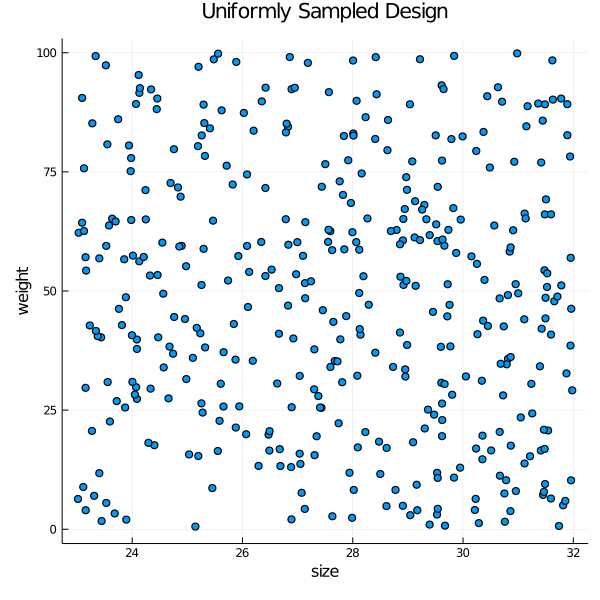

In [18]:
design = rand(design_distribution, 400)

@df design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    xlim = [23.0, 32.0],
    ylim = [0.0, 100.0],
    legend = false,
    title = "Uniformly Sampled Design")

# Generating Experiments for a Linear Model

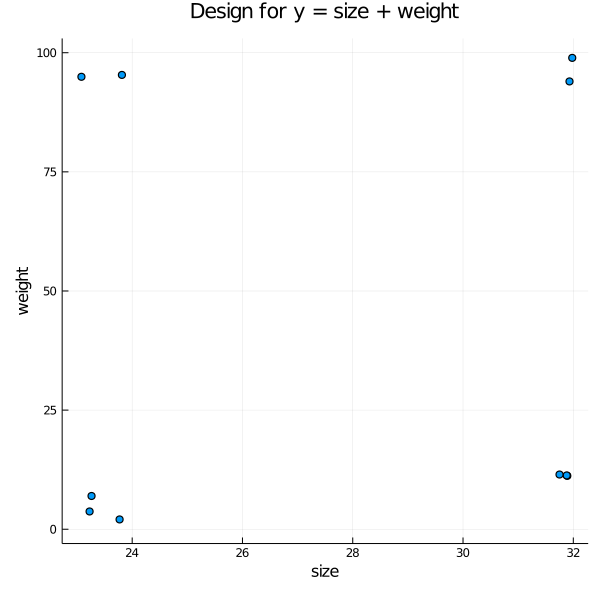

In [8]:
design = rand(design_distribution, 400);

f = @formula 0 ~ size + weight

optimal_design = OptimalDesign(design, f, 10)

@df optimal_design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    xlim = [23.0, 32.0],
    ylim = [0.0, 100.0],
    legend = false,
    title = "Design for y = size + weight")

# Generating Experiments for Other Terms

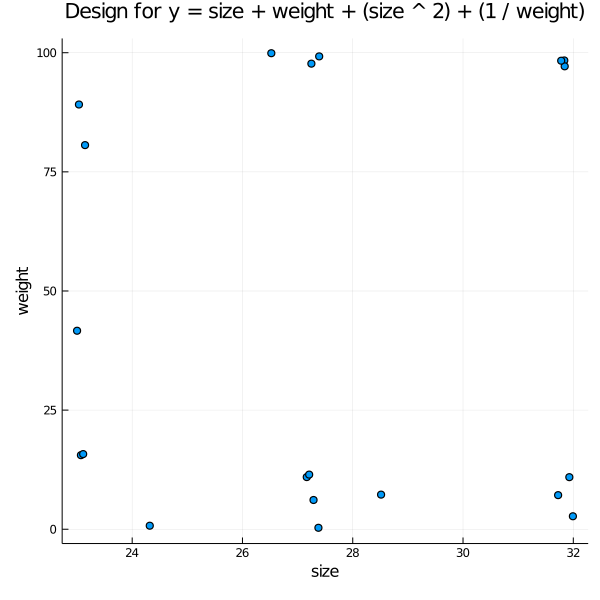

In [7]:
design = rand(design_distribution, 400);
f = @formula 0 ~ size + weight + size ^ 2 + (1 / weight)

optimal_design = OptimalDesign(design, f, 20)

@df optimal_design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    xlim = [23.0, 32.0],
    ylim = [0.0, 100.0],
    legend = false,
    title = "Design for y = size + weight + (size ^ 2) + (1 / weight)")

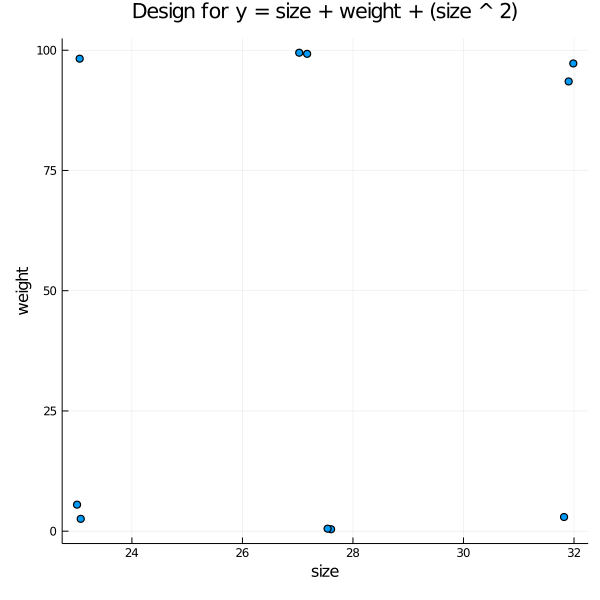

In [9]:
design = rand(design_distribution, 800);
f = @formula 0 ~ size + weight + size ^ 2
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    legend = false,
    title = "Design for y = size + weight + (size ^ 2)")

In [ ]:
design_distribution = DesignDistribution((f1 = DiscreteUniform(0, 5),
        f2 = Uniform(0, 1),
        f3 = CategoricalFactor([:a, :b, "0.2", 1.0, 3])))

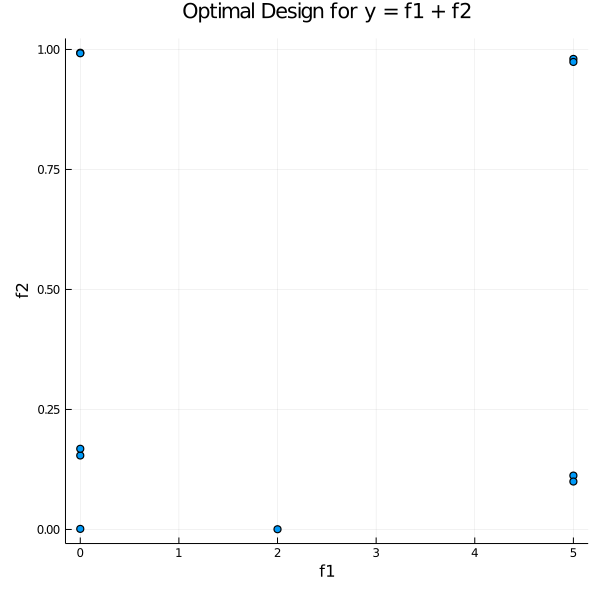

In [20]:
design = rand(design_distribution, 400);
f = @formula 0 ~ f1 + f2 + log(f2)
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Optimal Design for y = f1 + f2")